In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [2]:
customer = pd.read_csv(r"C:\Users\AntonRohith.J.B\OneDrive\Desktop\projects resume\assignmnet3\customer.csv")
purchase = pd.read_csv(r"C:\Users\AntonRohith.J.B\OneDrive\Desktop\projects resume\assignmnet3\purchase.csv")


In [3]:
#calculate total revenue per product
purchase['total_revenue'] = purchase['quantity'] * (purchase['price'] - purchase['discount'] + purchase['tax'])
product_revenue = purchase.groupby('product_name')['total_revenue'].sum().sort_values(ascending=False).head(5)


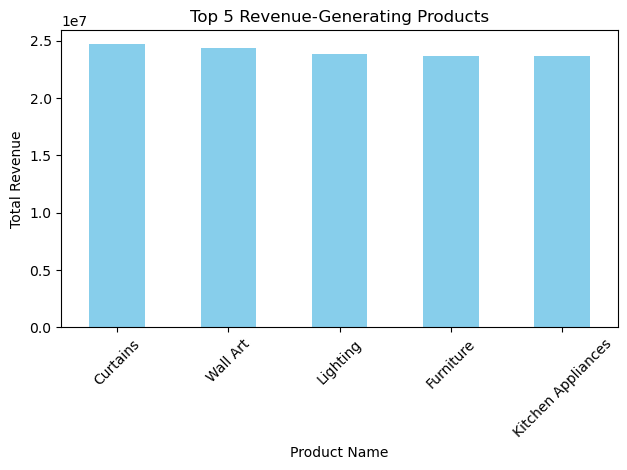

In [4]:
#visualize top 5 products
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 Revenue-Generating Products')
plt.ylabel('Total Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


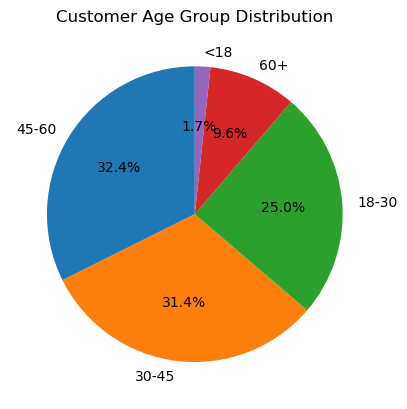

In [5]:
#CUSTOMER SEGMENTATION
#age distribution
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '30-45', '45-60', '60+']
customer['age_group'] = pd.cut(customer['age'], bins=bins, labels=labels)

customer['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Age Group Distribution')
plt.ylabel('')
plt.show()


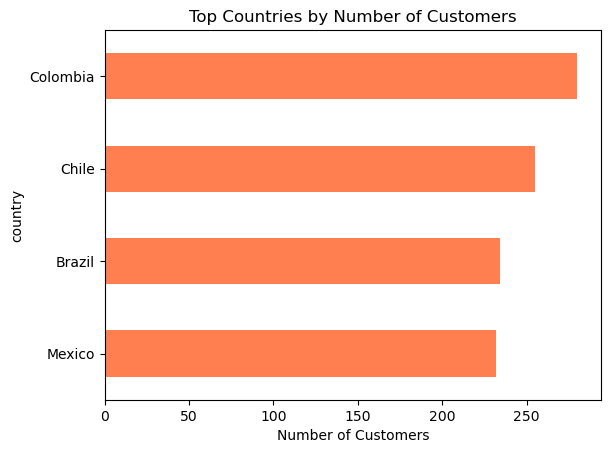

In [10]:
# Top Countries by Customer Count
top_countries = customer['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='coral')
plt.title('Top Countries by Number of Customers')
plt.xlabel('Number of Customers')
plt.gca().invert_yaxis()
plt.show()


In [11]:
#Average Shipping Cost by Shipping Duration
purchase['shipping_duration'] = (pd.to_datetime(purchase['shipping_date']) - pd.to_datetime(purchase['order_date'])).dt.days
grouped = purchase.groupby(purchase['shipping_duration'] <= 3)['shipping_cost'].mean()
print(grouped)


shipping_duration
False    27.491997
True     27.561145
Name: shipping_cost, dtype: float64


C:\Users\AntonRohith.J.B\AppData\Local\Temp\ipykernel_4736\308072996.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  purchase['shipping_duration'] = (pd.to_datetime(purchase['shipping_date']) - pd.to_datetime(purchase['order_date'])).dt.days
C:\Users\AntonRohith.J.B\AppData\Local\Temp\ipykernel_4736\308072996.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  purchase['shipping_duration'] = (pd.to_datetime(purchase['shipping_date']) - pd.to_datetime(purchase['order_date'])).dt.days


In [12]:
#Gender-Based Analysis
male_income = customer[customer['gender'] == 'Male']['income']
female_income = customer[customer['gender'] == 'Female']['income']
t_stat, p_val = ttest_ind(male_income, female_income, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_val}")


T-stat: -0.24472481790888942, P-value: 0.8067198406938872


In [13]:
# Merge data
merged = pd.merge(purchase, customer, on='customer_id')
contingency = pd.crosstab(merged['product_name'], merged['gender'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square: {chi2}, P-value: {p}")


Chi-square: 22.592714742452966, P-value: 0.7948435792013748


In [14]:
#correlation analysis
merged['total_cost'] = merged['quantity'] * (merged['price'] - merged['discount'] + merged['tax'])
correlation, pval = pearsonr(merged['income'], merged['total_cost'])
print(f"Correlation coefficient: {correlation}, P-value: {pval}")


Correlation coefficient: 0.003120892714825133, P-value: 0.4852790877704134


C:\Users\AntonRohith.J.B\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


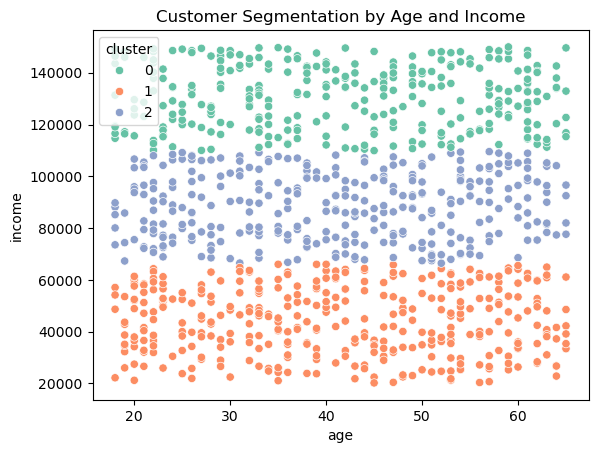

In [15]:
#customer segmentation through customer
X = customer[['age', 'income']]
kmeans = KMeans(n_clusters=3, random_state=42)
customer['cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=customer, x='age', y='income', hue='cluster', palette='Set2')
plt.title('Customer Segmentation by Age and Income')
plt.show()
